<a href="https://colab.research.google.com/github/kyungbinYoo/programming/blob/main/AIRQUALITY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib as plt
from folium import Map, Marker, Circle

df = pd.read_csv("/content/drive/MyDrive/data/Measurement_summary.csv")
df.head()

df['Station code'].unique()   #총 25개의 지역에서 수집

add = table = df.Address.groupby(df.Address, as_index=True)
df.drop("Address", axis=1, inplace=True)

# 새 섹션

In [ ]:
df.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:
df_loc102 = pd.DataFrame(df.loc[(df['Station code']==102)])
df_loc102.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
25905,2017-01-01 00:00,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0
25906,2017-01-01 01:00,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0
25907,2017-01-01 02:00,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0
25908,2017-01-01 03:00,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0
25909,2017-01-01 04:00,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0


In [ ]:
df_loc102['PM10'].loc[(df_loc102['PM10']<0)].count()


12

In [ ]:
df_loc102['PM2.5'].loc[(df_loc102['PM2.5']<0)].count()

10

In [ ]:
df_loc102['SO2'].loc[(df_loc102['SO2']<0)].count()

8

In [ ]:
df_loc102['NO2'].loc[(df_loc102['NO2']<0)].count()

9

In [ ]:
df_loc102['CO'].loc[(df_loc102['CO']<0)].count()

8

In [ ]:
df_loc102['O3'].loc[(df_loc102['O3']<0)].count()

32

In [ ]:
drop_contam = df_loc102.loc[(df_loc102['SO2']<0) | (df_loc102['NO2']<0) | (df_loc102['CO']<0) | (df_loc102['O3']<0)
| (df_loc102['PM2.5']<0) | (df_loc102['PM10']<0) ]
drop_contam

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
26448,2017-01-23 15:00,102,37.564263,126.974676,0.033,0.018,0.068,3.4,-1.0,26.0
27024,2017-02-16 15:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
27505,2017-03-08 16:00,102,37.564263,126.974676,0.082,0.008,0.010,8.7,-1.0,-1.0
28297,2017-04-10 16:00,102,37.564263,126.974676,0.004,0.025,0.021,0.5,-1.0,7.0
28916,2017-05-06 11:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
31168,2017-08-08 07:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
31514,2017-08-22 17:00,102,37.564263,126.974676,0.002,0.025,0.037,0.4,-1.0,-1.0
34223,2017-12-13 14:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
35252,2018-01-25 11:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0
35253,2018-01-25 12:00,102,37.564263,126.974676,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0


In [ ]:
df_loc102.drop(drop_contam.index, axis=0, inplace=True)

In [ ]:
for(idx, row) in df_loc102.iterrows():
  PM25 = row[9]
  PM25_cai = -1
  if PM25<0:
    continue
  elif 0<PM25<30:
    PM25_cai = 0
  elif 30<PM25<80:
    PM25_cai = 1
  elif 80<PM25<150:
    PM25_cai = 2
  else:
    PM25_cai = 3

  df_loc102.loc[idx,"PM25_CAI"] = PM25_cai
df_loc102.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI
25905,2017-01-01 00:00,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0
25906,2017-01-01 01:00,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0
25907,2017-01-01 02:00,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0
25908,2017-01-01 03:00,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0
25909,2017-01-01 04:00,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0


In [ ]:
df_loc102.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI
25905,2017-01-01 00:00,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0
25906,2017-01-01 01:00,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0
25907,2017-01-01 02:00,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0
25908,2017-01-01 03:00,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0
25909,2017-01-01 04:00,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0


In [ ]:
df_loc102['PM25_CAI'].value_counts()

0.0    19609
1.0     5431
3.0      494
2.0      334
Name: PM25_CAI, dtype: int64

In [ ]:
df_loc102.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI
25905,2017-01-01 00:00,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0
25906,2017-01-01 01:00,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0
25907,2017-01-01 02:00,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0
25908,2017-01-01 03:00,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0
25909,2017-01-01 04:00,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0


In [ ]:
date_time = df_loc102['Measurement date'].str.split(" ", n=1, expand=True)
date_time.head()

,0,1
25905,2017-01-01,00:00
25906,2017-01-01,01:00
25907,2017-01-01,02:00
25908,2017-01-01,03:00
25909,2017-01-01,04:00


In [ ]:
df_loc102['date'] = date_time[0]
df_loc102['time'] = date_time[1]
df_loc102 = df_loc102.drop(['Measurement date'], axis=1)
df_loc102.head()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI,date,time
25905,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0,2017-01-01,00:00
25906,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0,2017-01-01,01:00
25907,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0,2017-01-01,02:00
25908,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0,2017-01-01,03:00
25909,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0,2017-01-01,04:00


In [ ]:
df_group = df_loc102.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_group.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.005417,0.056667,0.003042,1.000000,81.416667,64.250000
1,2017-01-02,0.005583,0.045250,0.017042,0.891667,108.291667,82.333333
2,2017-01-03,0.005125,0.049083,0.012917,0.700000,72.916667,49.791667
3,2017-01-04,0.005083,0.056667,0.009125,0.862500,50.958333,34.375000
4,2017-01-05,0.003958,0.044833,0.007833,0.645833,34.666667,23.125000


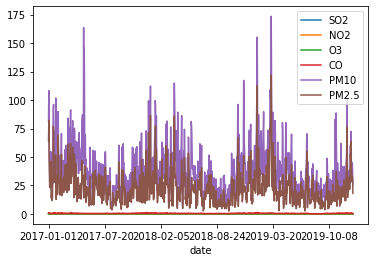

In [ ]:
df_group.plot(x='date')

In [ ]:
for(idx, row) in df_group.iterrows():
  PM25 = row[6]
  PM25_cai = -1
  if PM25<0:
    continue
  elif 0<PM25<15:
    PM25_cai = 0
  elif 15<PM25<35:
    PM25_cai = 1
  elif 35<PM25<75:
    PM25_cai = 2
  else:
    PM25_cai = 3

  df_group.loc[idx,"PM2.5_CAI"] = PM25_cai
df_group.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5,PM2.5_CAI
0,2017-01-01,0.005417,0.056667,0.003042,1.000000,81.416667,64.250000,2.0
1,2017-01-02,0.005583,0.045250,0.017042,0.891667,108.291667,82.333333,3.0
2,2017-01-03,0.005125,0.049083,0.012917,0.700000,72.916667,49.791667,2.0
3,2017-01-04,0.005083,0.056667,0.009125,0.862500,50.958333,34.375000,1.0
4,2017-01-05,0.003958,0.044833,0.007833,0.645833,34.666667,23.125000,1.0


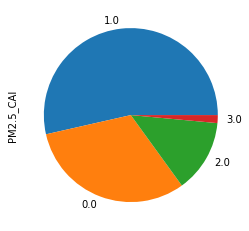

In [ ]:
df_group['PM2.5_CAI'].value_counts().plot(kind="pie")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_loc102["year"]=df_loc102["date"].str[0:4]
df_loc102["mon"]=df_loc102["date"].str[5:7]
df_loc102["day"]=df_loc102["date"].str[8:10]

In [ ]:
df_loc102.head()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI,date,time,year,mon,day
25905,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0,2017-01-01,00:00,2017,01,01
25906,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0,2017-01-01,01:00,2017,01,01
25907,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0,2017-01-01,02:00,2017,01,01
25908,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0,2017-01-01,03:00,2017,01,01
25909,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0,2017-01-01,04:00,2017,01,01


In [ ]:
df_loc102.drop("date", axis=1, inplace=True)

In [ ]:
df_loc102.head()

,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,PM25_CAI,time,year,mon,day
25905,102,37.564263,126.974676,0.006,0.068,0.002,1.3,77.0,63.0,1.0,00:00,2017,01,01
25906,102,37.564263,126.974676,0.006,0.066,0.002,1.4,76.0,63.0,1.0,01:00,2017,01,01
25907,102,37.564263,126.974676,0.005,0.063,0.002,1.2,73.0,57.0,1.0,02:00,2017,01,01
25908,102,37.564263,126.974676,0.005,0.053,0.002,1.1,67.0,55.0,1.0,03:00,2017,01,01
25909,102,37.564263,126.974676,0.004,0.051,0.002,1.1,66.0,54.0,1.0,04:00,2017,01,01


In [ ]:
df_loc102["time_hour"]=df_loc102["time"].str[0:2]

In [ ]:
df_loc102.drop("time", axis=1, inplace=True)

In [ ]:
x = df_loc102.drop('PM25_CAI',axis=1)
y = df_loc102['PM25_CAI']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=34)
print('x_train: {:,} \nx_test: {:,}\ny_train: {:,} \ny_test: {:,}'.format(len(x_train), len(x_test), len(y_train),
                                                                  len(y_test)))

x_train: 20,694 
x_test: 5,174
y_train: 20,694 
y_test: 5,174


In [ ]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_test)
print(accuracy_score(y_test,predict1))

0.9858909934286819


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,predict1)

array([[3900,    0,    0,    0],
       [   0, 1129,    0,    0],
       [   0,    9,   43,    0],
       [   0,   64,    0,   29]])

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
def get_clf_eval(y_test,pred):
  confusion= confusion_matrix(y_test,predict1)
  accuracy=accuracy_score(y_test,predict1)
  precision= precision_score(y_test,predict1, average='micro')
  recall=recall_score(y_test,predict1,average='micro')
  print("오차행렬:")
  print(confusion)
  print('정확도: {0:4f}, 정밀도: {1:4f}, 재현율: {2:4f}'.format(accuracy,precision,recall))

In [ ]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_test)
print('정확도:')
print(accuracy_score(y_test,predict1))
get_clf_eval(y_test,predict1)


정확도:
0.9858909934286819
오차행렬:
[[3900    0    0    0]
 [   0 1129    0    0]
 [   0    9   43    0]
 [   0   64    0   29]]
정확도: 0.985891, 정밀도: 0.985891, 재현율: 0.985891


In [ ]:
from sklearn.metrics import f1_score
f1= f1_score(y_test,predict1,average='micro')
print(f1)

0.9858909934286819
